<a href="https://colab.research.google.com/github/WafaSanaa/Machine-Learning/blob/main/Regression_Model_for_University_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files

uploaded = files.upload()

Saving university_admission.csv to university_admission.csv


In [5]:
# Read the CSV file
df = pd.read_csv("university_admission.csv")
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
# Load the top 6 instances
df.head(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90


In [7]:
# Load the bottom 6 instances
df.tail(6)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
994,301,99,3,2.5,2.0,8.45,1,0.68
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73
999,327,113,4,4.5,4.5,9.04,0,0.84


In [8]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_Score            1000 non-null   int64  
 1   TOEFL_Score          1000 non-null   int64  
 2   University_Rating    1000 non-null   int64  
 3   SOP                  1000 non-null   float64
 4   LOR                  1000 non-null   float64
 5   CGPA                 1000 non-null   float64
 6   Research             1000 non-null   int64  
 7   Chance_of_Admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [12]:
# Check if any missing values are present in the dataframe
df.isnull().sum()

,0
GRE_Score,0
TOEFL_Score,0
University_Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admission,0


<Axes: >

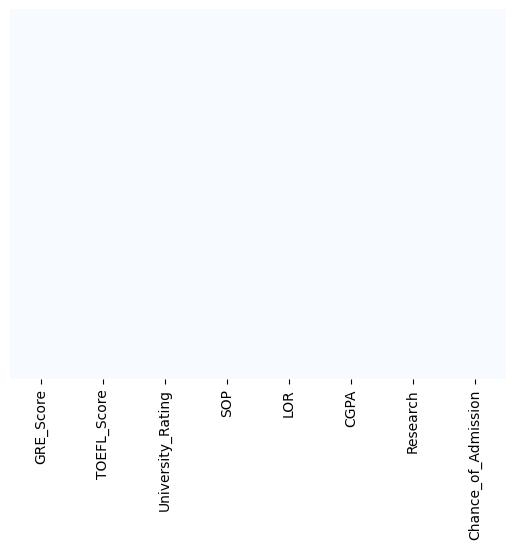

In [13]:
#check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

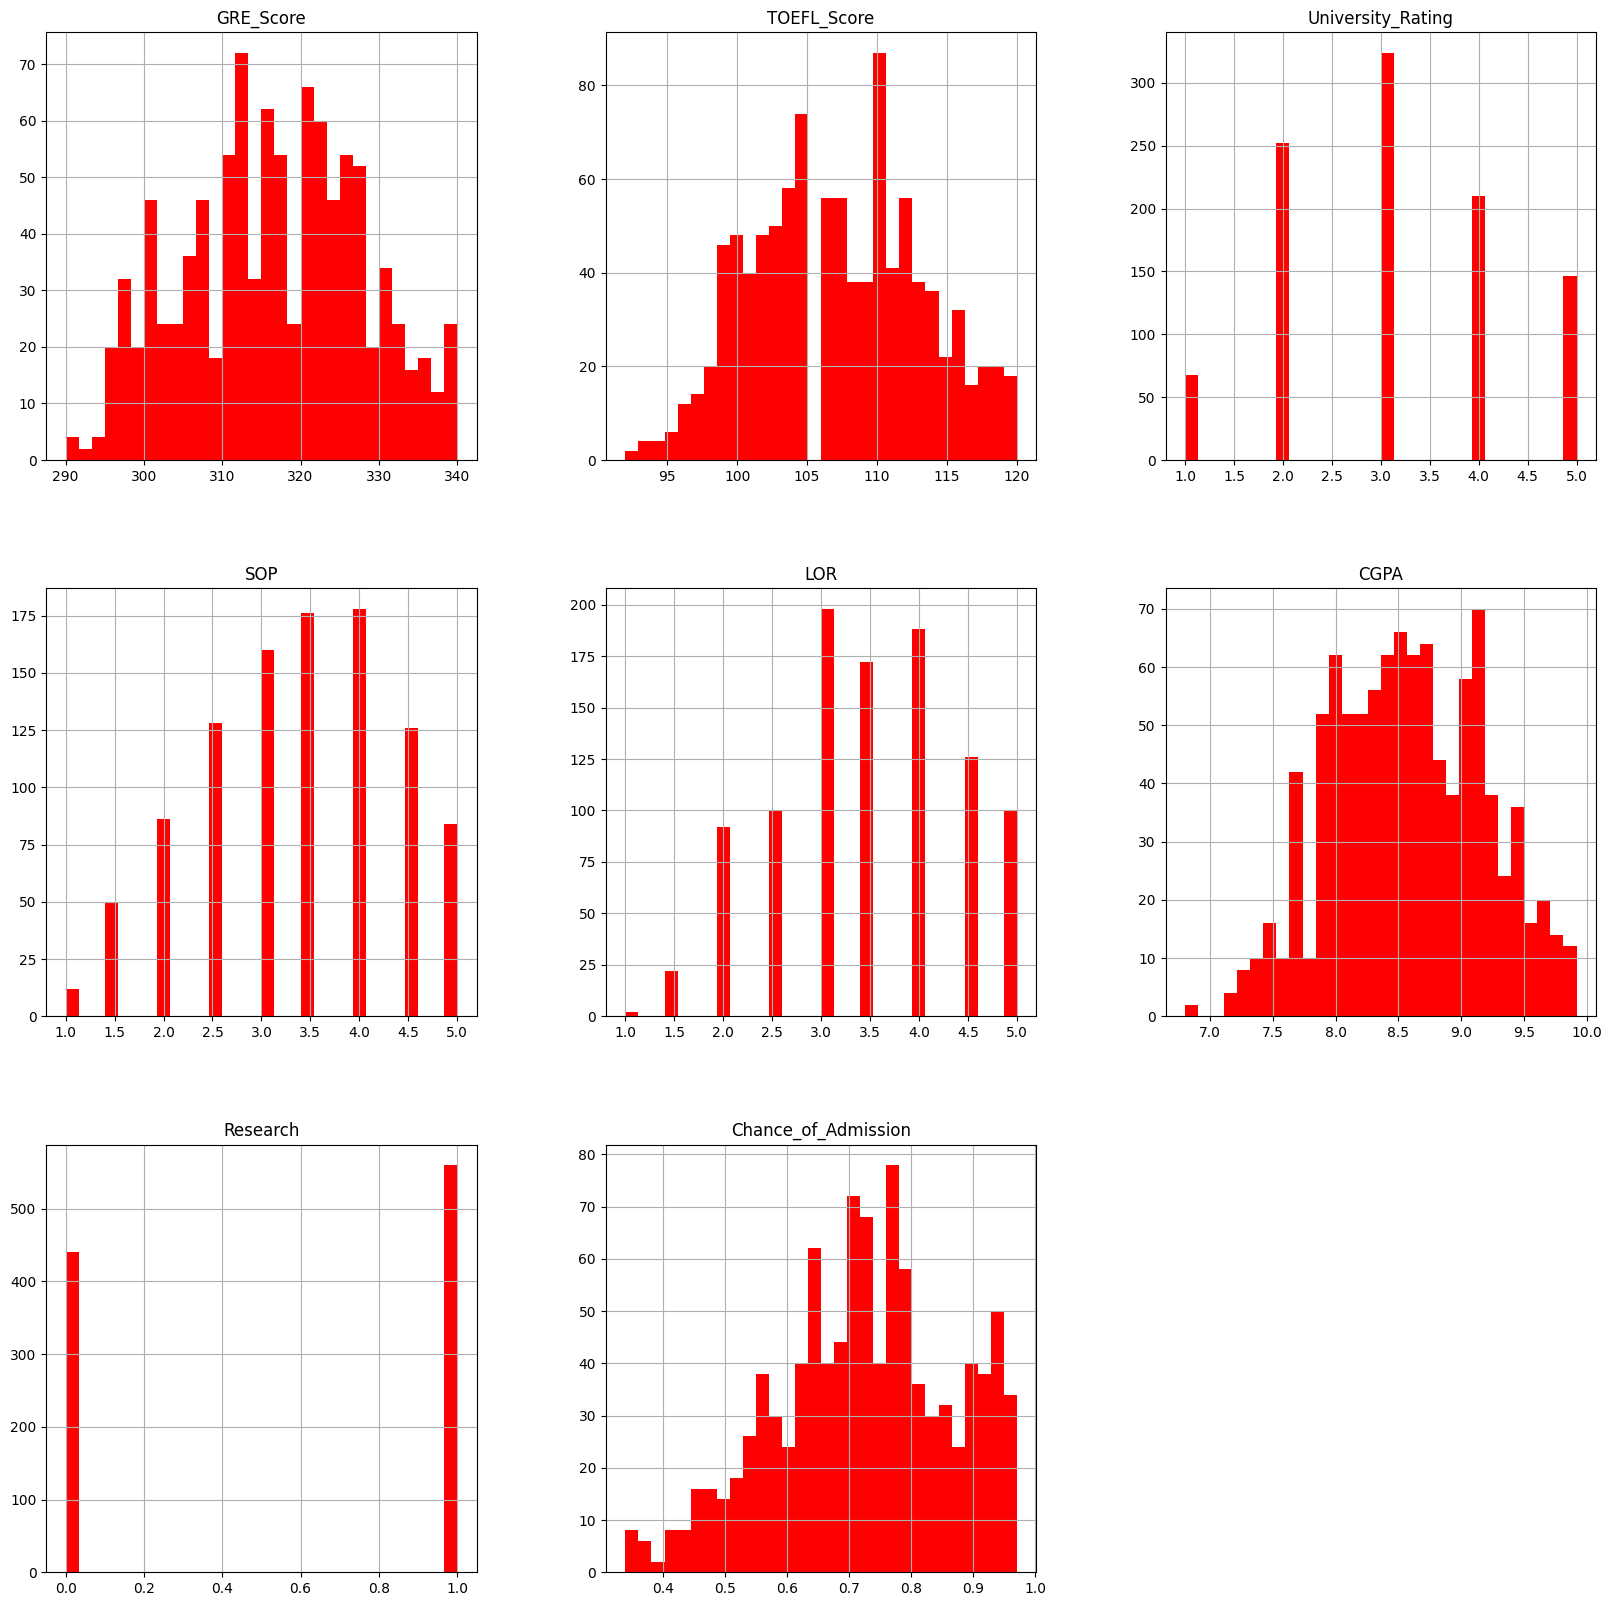

In [14]:
df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

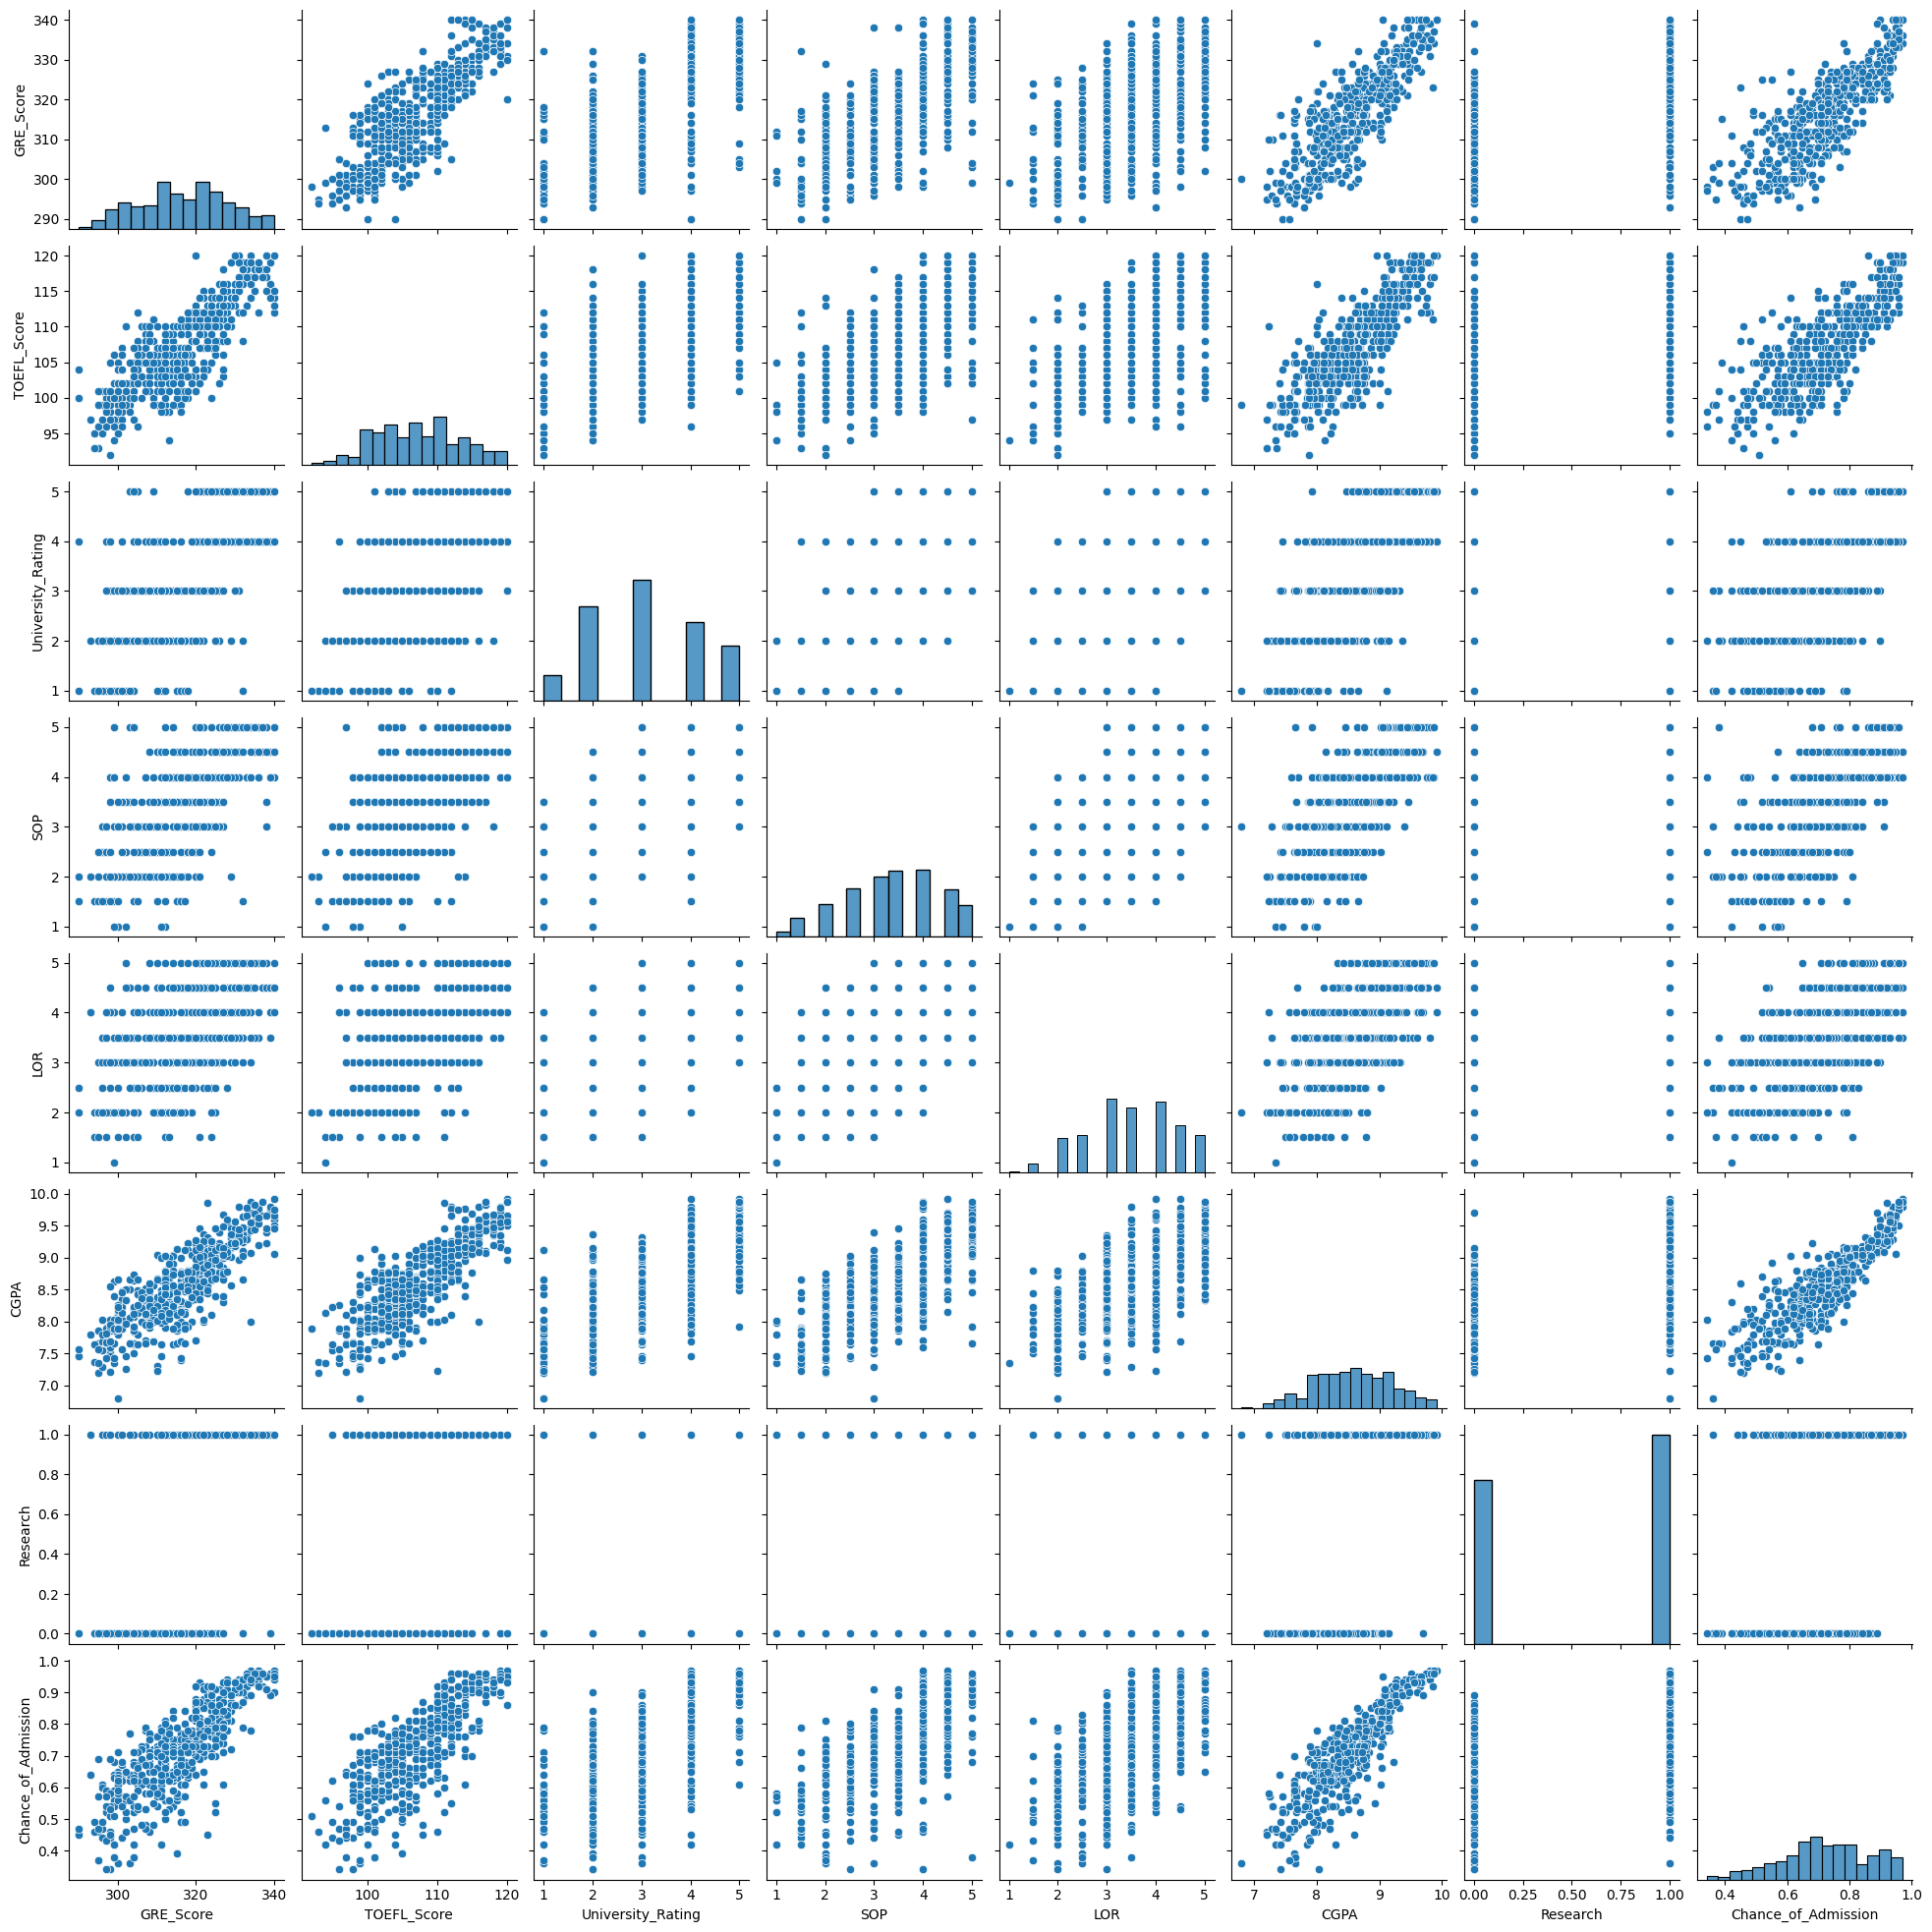

In [15]:
sns.pairplot(df)
plt.show()

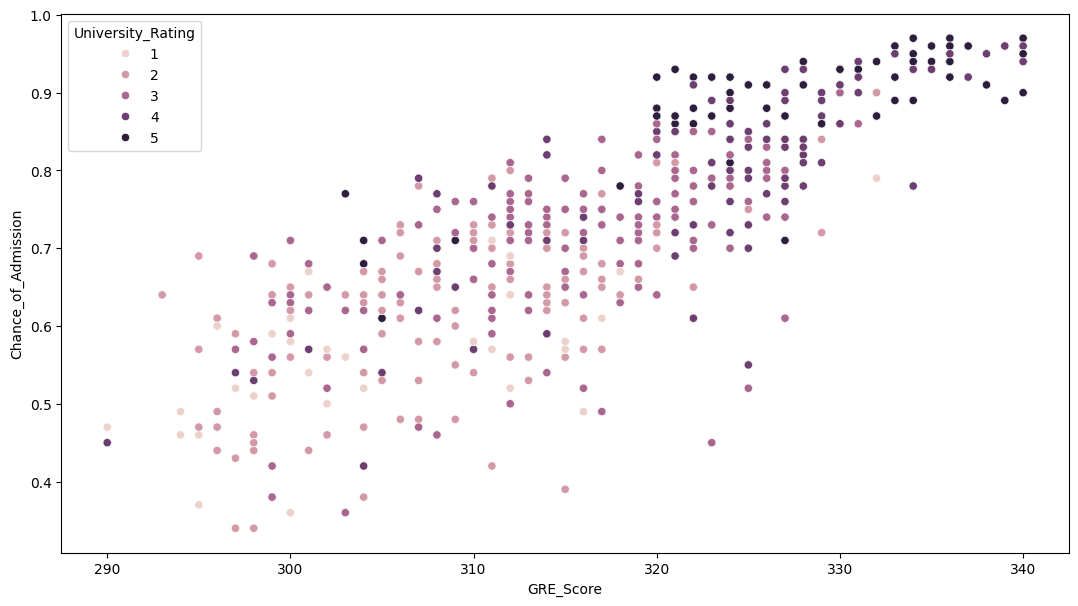

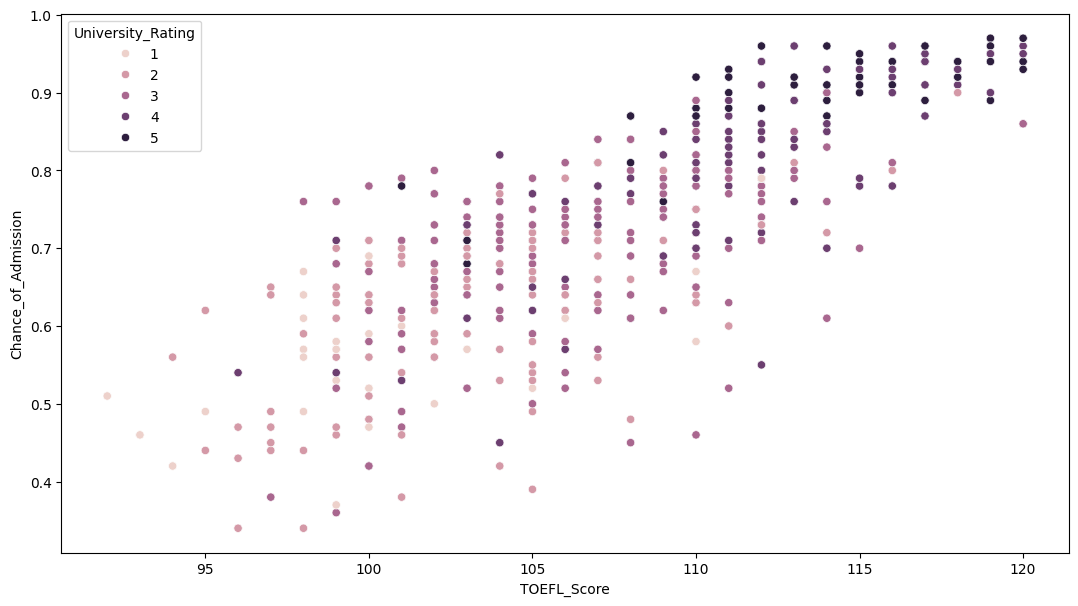

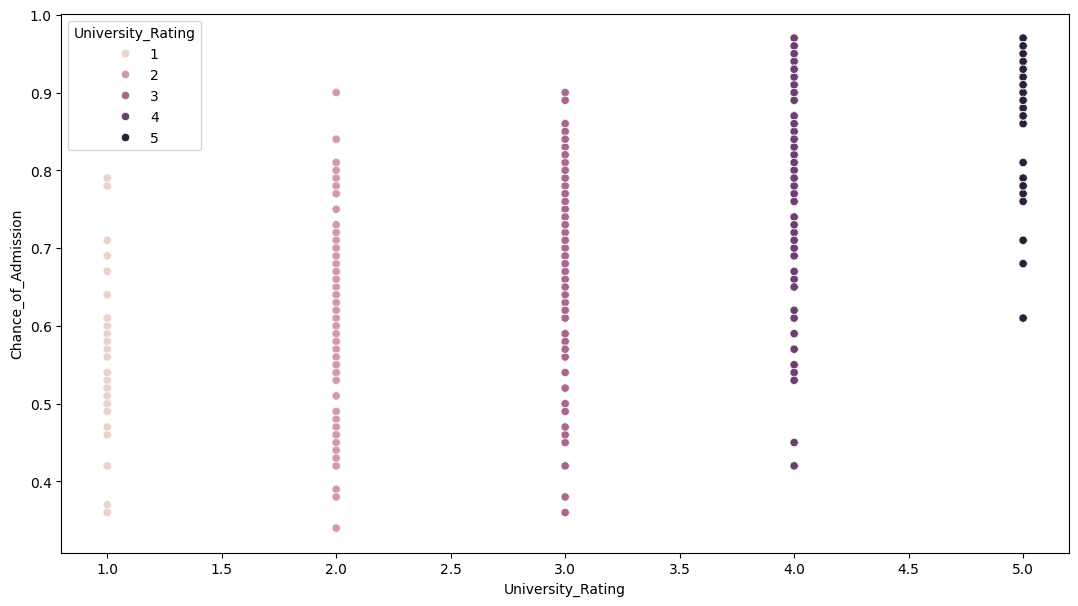

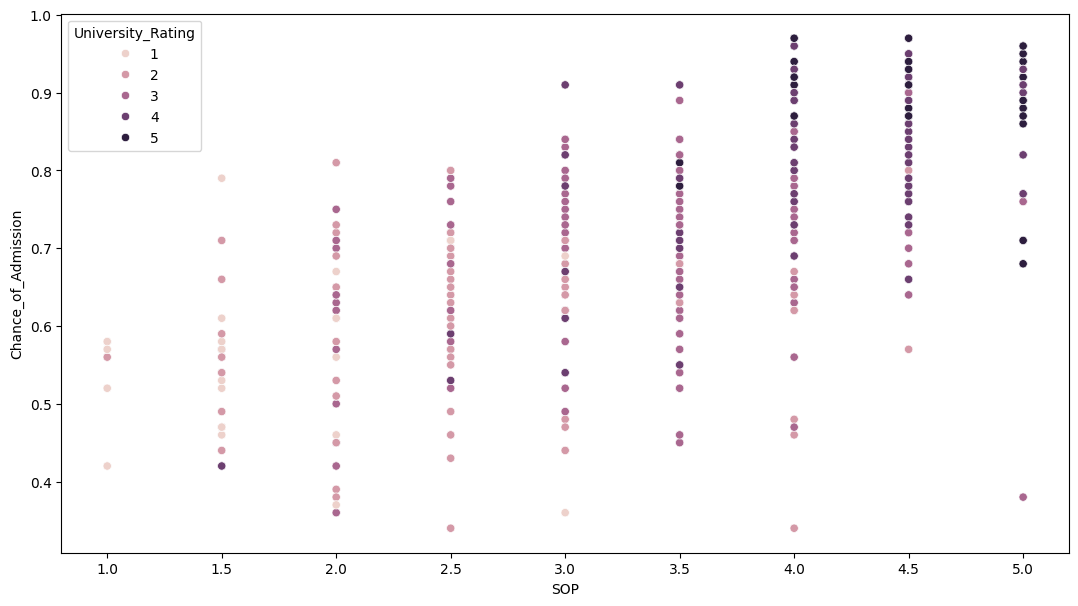

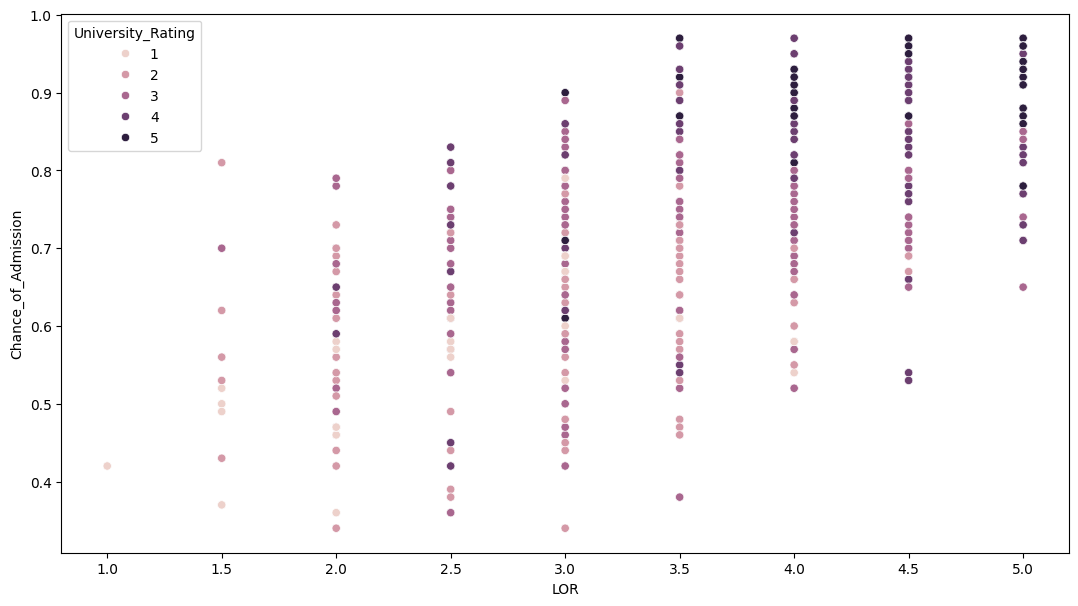

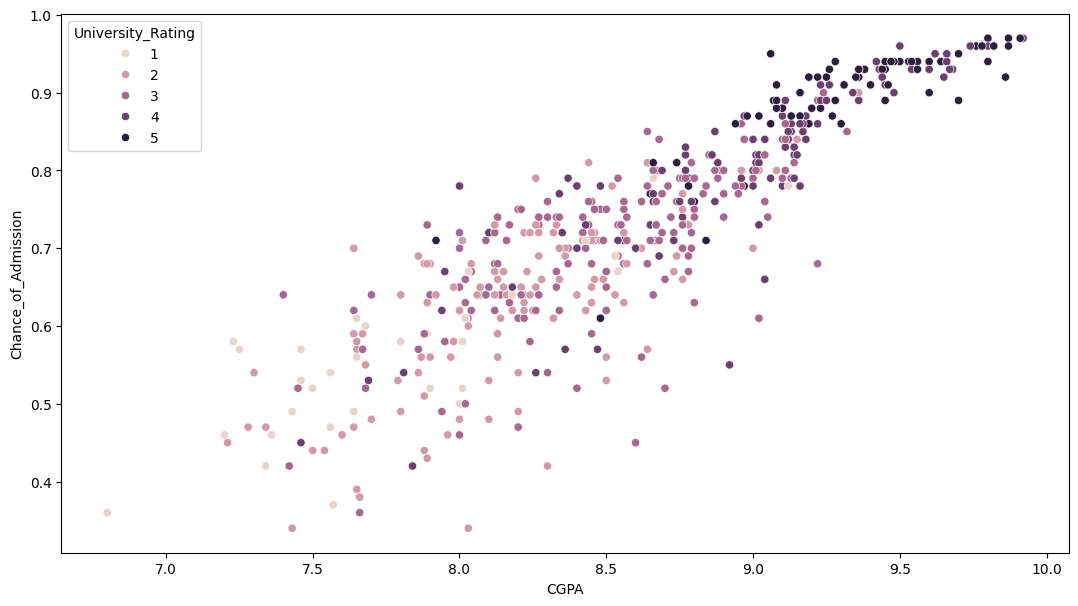

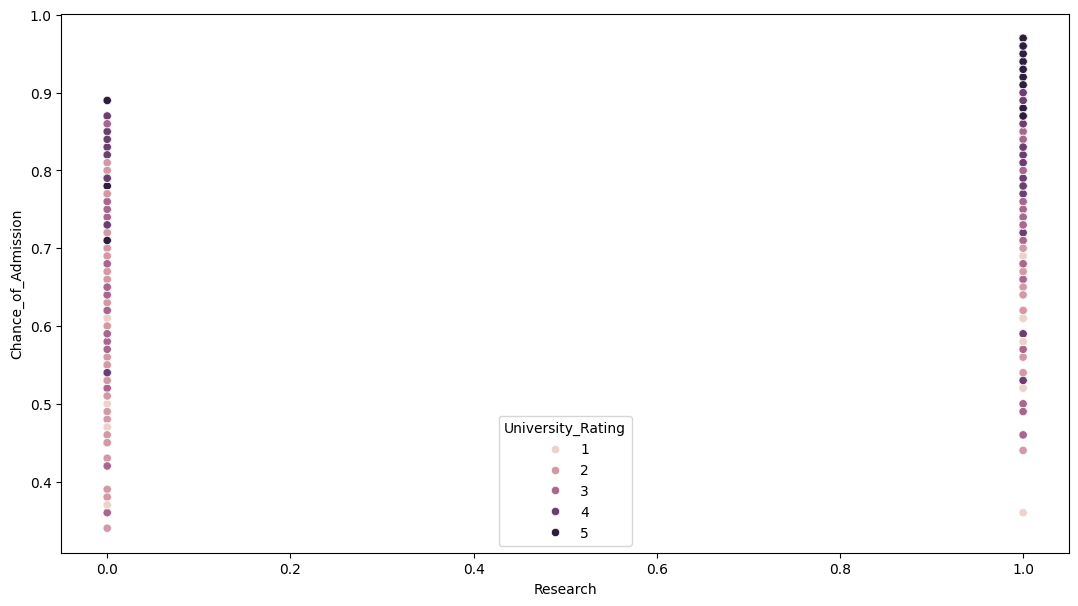

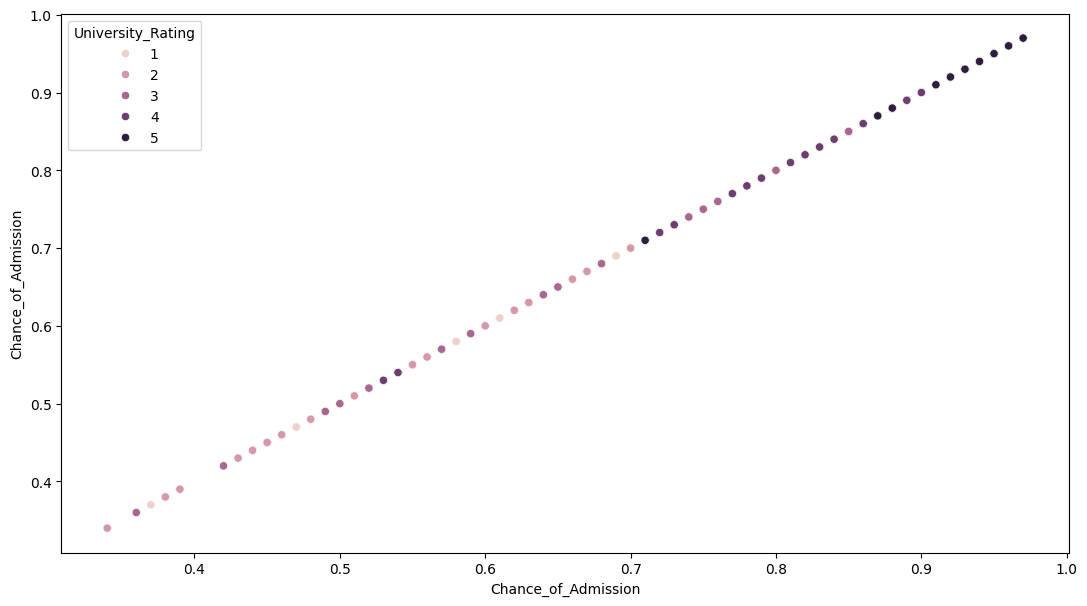

In [16]:
for i in df.columns:

  plt.figure(figsize = (13, 7))
  sns.scatterplot(x = i, y = 'Chance_of_Admission', hue = "University_Rating", hue_norm = (1,5), data = df)
  plt.show()

In [17]:
X = df.drop(columns = ['Chance_of_Admission'])

In [18]:
y = df['Chance_of_Admission']

In [19]:
# Convert the data type to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [20]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
X_train.shape

(700, 7)

In [22]:
X_test.shape

(300, 7)

In [23]:
y.shape

(1000,)

In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
y.shape

(1000, 1)

# PRACTICE OPPORTUNITY SOLUTION:
**Set the max depth hyperparameter to a very small number and retrain the model**

**What do you infer from these results?**

In [26]:
# Train an XGBoost regressor model
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 2, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8512424230575562


In [28]:
# make predictions on the test data
y_predict = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.055 
MSE = 0.0030027509201318026 
MAE = 0.03769415616989136 
R2 = 0.8512424230575562 
Adjusted R2 = 0.8476763167609908


**Set the max depth hyperparameter to a high value and retrain the model.**
**What do you infer from these results?**

In [30]:
# Train an XGBoost regressor model
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
# predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9484835863113403


In [32]:
# make predictions on the test data
y_predict = model.predict(X_test)
y_predict

array([0.70007896, 0.7101395 , 0.73015475, 0.6295212 , 0.6938089 ,
       0.54003763, 0.64851344, 0.7196682 , 0.89530575, 0.62029123,
       0.70014405, 0.78056157, 0.5120891 , 0.5895055 , 0.7603503 ,
       0.909137  , 0.88604957, 0.63995934, 0.94005585, 0.46224976,
       0.6194634 , 0.92910963, 0.749001  , 0.4925111 , 0.820169  ,
       0.79949015, 0.7404915 , 0.42326036, 0.8107039 , 0.38078007,
       0.5405518 , 0.96937096, 0.9591382 , 0.7391269 , 0.6185719 ,
       0.7897415 , 0.89145255, 0.92042226, 0.47010377, 0.46004334,
       0.8683642 , 0.72969246, 0.91084725, 0.83218133, 0.83218133,
       0.61026263, 0.5898678 , 0.5098865 , 0.83969194, 0.86041677,
       0.6708899 , 0.6100664 , 0.3614275 , 0.7391429 , 0.61062086,
       0.75905687, 0.71165854, 0.5596021 , 0.720078  , 0.57937574,
       0.71936107, 0.71930116, 0.7001463 , 0.7100334 , 0.7102492 ,
       0.79012996, 0.42059025, 0.66055954, 0.84909886, 0.71165854,
       0.63038963, 0.6697519 , 0.8828513 , 0.8828513 , 0.92059

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.032 
MSE = 0.001039886032231152 
MAE = 0.01082437951117754 
R2 = 0.9484835863113403 
Adjusted R2 = 0.9472486037914067
